In [32]:
import sys
sys.path.append('../cmake-build-release-gcc/src/python/')
import pyslise as ps
def V(x):
    return [[x*x, 0], [0, x*x]]
M = 10
scs = ps.Pyscs(V, 2, 0, M, 8)

In [33]:
def error1(E):
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return det(block_matrix([[l, r], [dl, dr]]))

def error2(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    return det(left-right)

def error3(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return det(l/dl - r/dr)

def data3(E):
    left = matrix(scs.propagatePsi(E, matrix.zero(2,2), 0, M/2))
    right = matrix(scs.propagatePsi(E, matrix.zero(2,2), M, M/2))
    l, dl = map(matrix, scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, M/2)[0])
    r, dr = map(matrix, scs.propagate(E,(matrix.zero(2,2), matrix.identity(2,2)), M, M/2)[0])
    return (l, dl), (r, dr)

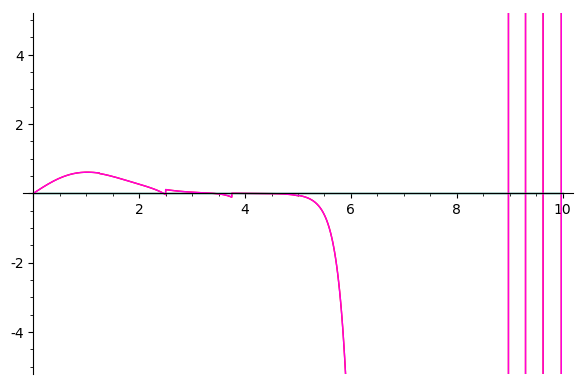

In [34]:
E = 3
Mv = 5
(sum(
    plot(lambda x: scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, x)[0][0][i][j],
         (0, M), color=hue(golden_ratio*(i+2*j)))
    for i in range(0,2) for j in range(0,2))
).show(ymax=Mv, ymin=-Mv)

In [17]:
E = 3
x = 3
scs.propagate(E, (matrix.zero(2,2), matrix.identity(2,2)), 0, x)[0][0][0][0]

0.03332663856825503

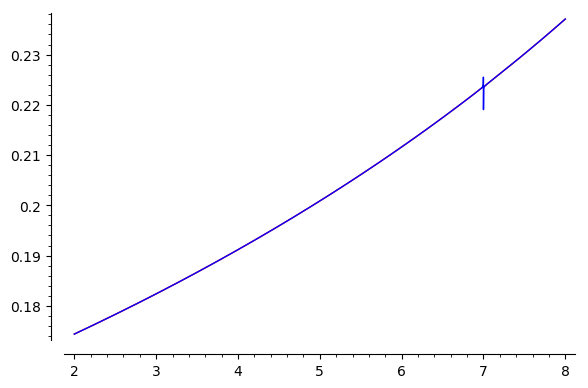

In [5]:
plot(error2, (2, 8), color="red") + plot(error3, (2, 8))

In [6]:
(l, dl), (r, dr) = data3(7)

In [7]:
l, dl

(
[-0.00029190626467613906                     0.0]
[                    0.0 -0.00029190626467613906],

[0.001277060829456166                  0.0]
[                 0.0 0.001277060829456166]
)

In [8]:
dl

[0.001277060829456166                  0.0]
[                 0.0 0.001277060829456166]